In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from utils.plot_trajectory_2d import plot_levels, plot_trajectory
from sklearn.datasets import load_svmlight_file
from tqdm import tqdm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
from task3.optimization import barrier_method_lasso
from task3.oracles import lasso_duality_gap

## Вариация $\varepsilon_{inner}$ 

iterations_exceeded
CPU times: user 16.9 s, sys: 924 ms, total: 17.8 s
Wall time: 9.8 s


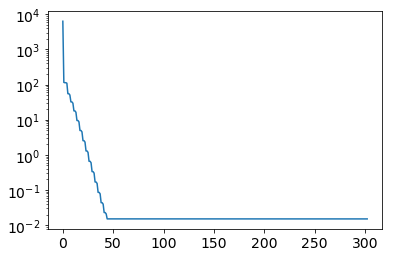

In [21]:
%%time

n = 300
m = 500
b_noise_ampl = 0.0001
A = np.random.rand(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
reg_coef = 1

x0 = np.random.rand(n)
u0 = x0 + 1

x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0,
                                           lasso_duality_gap=lasso_duality_gap, max_iter_inner=1, trace=True)
print(message)
semilogy(history["duality_gap"])

In [22]:
%%time

e_histories = []

n = 500
m = 1000
b_noise_ampl = 0.0001
A = np.random.rand(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
reg_coef = 1

x0 = np.random.rand(n)
u0 = x0 + 1

for e in tqdm([10**i for i in range(-3, -12, -2)]):
    x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7, tolerance_inner=e,
                                       lasso_duality_gap=lasso_duality_gap, trace=True)
    e_histories.append(history)


 40%|████      | 2/5 [00:08<00:12,  4.17s/it]
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/Users/aksholokhov/.anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/aksholokhov/.anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/aksholokhov/.anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 5/5 [00:22<00:00,  4.57s/it]

CPU times: user 35.9 s, sys: 4.28 s, total: 40.2 s
Wall time: 22.9 s


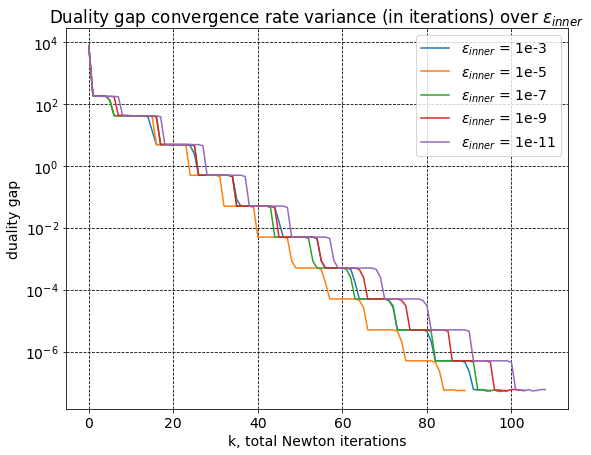

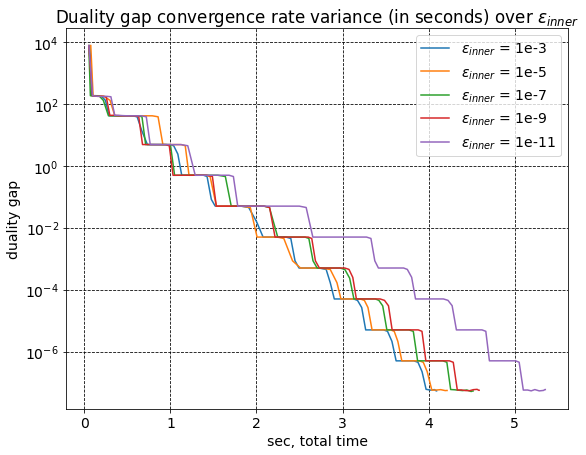

In [25]:
figure(figsize=(9, 7))
for e, hist in zip(range(-3, -12, -2), e_histories):
    semilogy(hist["duality_gap"], label=r"$\varepsilon_{inner}$ = 1e%d"%e)
xlabel("k, total Newton iterations")
ylabel("duality gap")
title(r"Duality gap convergence rate variance (in iterations) over $\varepsilon_{inner}$")
plt.grid(which='major', color='k', linestyle='--')
#plt.grid(which='minor', color='b', linestyle='-')
legend()
savefig('e_i.png', bbox_inches='tight')

figure(figsize=(9, 7))
for e, hist in zip(range(-3, -12, -2), e_histories):
    semilogy(hist["time"], hist["duality_gap"], label=r"$\varepsilon_{inner}$ = 1e%d"%e)
xlabel("sec, total time")
ylabel("duality gap")
title(r"Duality gap convergence rate variance (in seconds) over $\varepsilon_{inner}$")
legend()
plt.grid(which='major', color='k', linestyle='--')
savefig('e_t.png', bbox_inches='tight')

___

## Вариация $\gamma$

In [30]:
gamma_histories = []

n = 300
m = 500
b_noise_ampl = 0.0001
A = np.random.rand(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
reg_coef = 1
grid = range(1, 8, 2)

x0 = np.random.rand(n)
u0 = x0 + 1

for gamma in tqdm([10**i for i in grid]):
    x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7, gamma=gamma,
                                       lasso_duality_gap=lasso_duality_gap, trace=True)
    gamma_histories.append(history)


100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


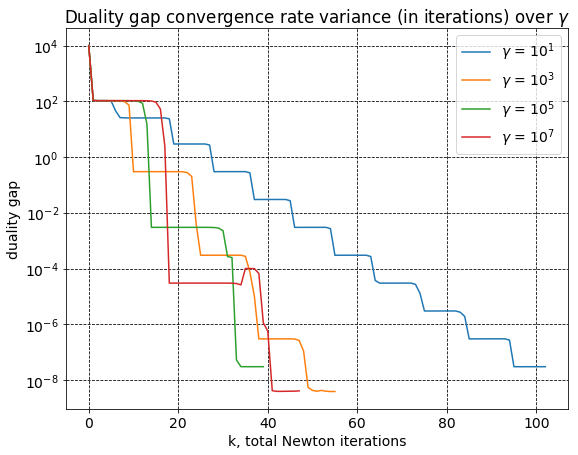

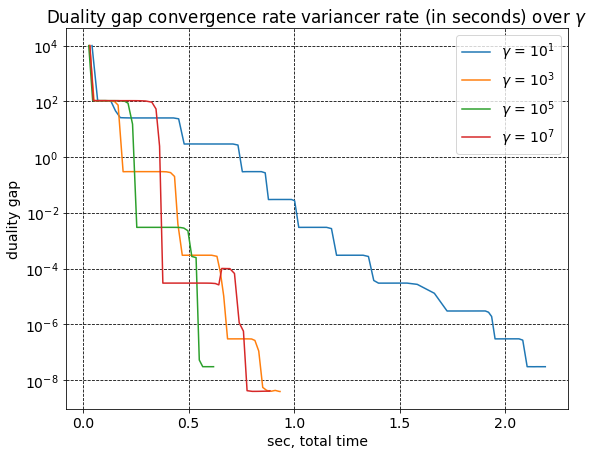

In [31]:
figure(figsize=(9, 7))
for e, hist in zip(grid, gamma_histories):
    semilogy(hist["duality_gap"], label=r"$\gamma$ = $10^{%d}$"%e)
xlabel("k, total Newton iterations")
ylabel("duality gap")
title(r"Duality gap convergence rate variance (in iterations) over $\gamma$")
legend()
plt.grid(which='major', color='k', linestyle='--')
savefig('g_i.png', bbox_inches='tight')

figure(figsize=(9, 7))
for e, hist in zip(grid, gamma_histories):
    semilogy(hist["time"], hist["duality_gap"], label=r"$\gamma$ = $10^{%d}$"%e)
xlabel("sec, total time")
ylabel("duality gap")
title(r"Duality gap convergence rate variancer rate (in seconds) over $\gamma$")
legend()
plt.grid(which='major', color='k', linestyle='--')
savefig('g_t.png', bbox_inches='tight')

---

## Вариация n 

In [32]:
n_histories = []
grid = range(100, 701, 200)

for n in tqdm(grid):
    m = 1001
    b_noise_ampl = 0.01
    A = np.random.rand(m, n)
    x_true = np.random.rand(n)
    b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
    reg_coef = 1
    x0 = np.random.rand(n)
    u0 = x0 + 1
    
    x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7,
                                       lasso_duality_gap=lasso_duality_gap, trace=True)
    n_histories.append(history)


 75%|███████▌  | 3/4 [00:07<00:02,  2.47s/it]
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/Users/aksholokhov/.anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/aksholokhov/.anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/aksholokhov/.anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 4/4 [00:17<00:00,  4.36s/it]


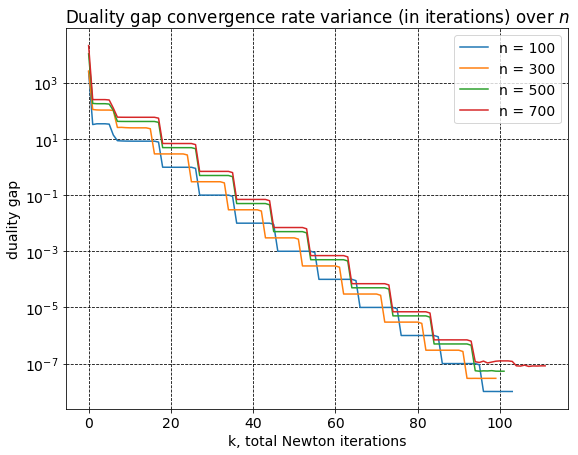

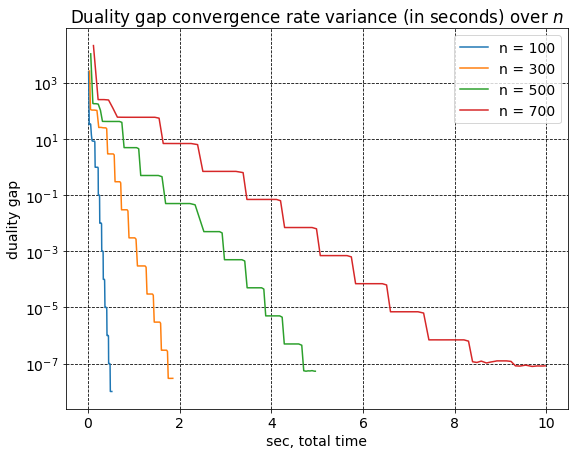

In [33]:
figure(figsize=(9, 7))
for e, hist in zip(grid, n_histories):
    semilogy(hist["duality_gap"], label=r"n = %d"%e)
xlabel("k, total Newton iterations")
ylabel("duality gap")
title(r"Duality gap convergence rate variance (in iterations) over $n$")
legend()
plt.grid(which='major', color='k', linestyle='--')
savefig('n_i.png', bbox_inches='tight')

figure(figsize=(9, 7))
for e, hist in zip(grid, n_histories):
    semilogy(hist["time"], hist["duality_gap"], label=r"n = %d"%e)
xlabel("sec, total time")
ylabel("duality gap")
title(r"Duality gap convergence rate variance (in seconds) over $n$")
legend()
plt.grid(which='major', color='k', linestyle='--')
savefig('n_t.png', bbox_inches='tight')

## Вариация m

In [34]:
m_histories = []
grid = range(5000, 30001, 5000)

for m in tqdm(grid):
    n = 50
    b_noise_ampl = 0.01
    A = np.random.rand(m, n)
    x_true = np.random.rand(n)
    b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
    reg_coef = 1
    x0 = np.random.rand(n)
    u0 = x0 + 1
    
    x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7,
                                       lasso_duality_gap=lasso_duality_gap, trace=True)
    m_histories.append(history)

100%|██████████| 6/6 [00:03<00:00,  1.81it/s]


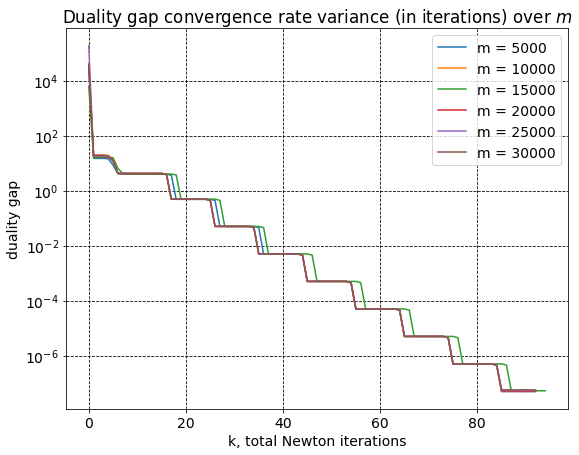

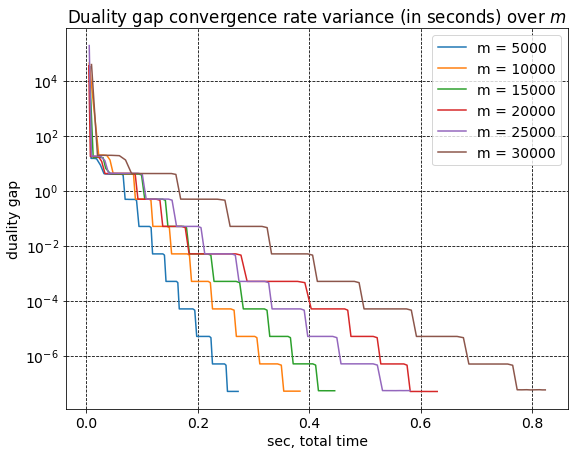

In [35]:
figure(figsize=(9, 7))
for e, hist in zip(grid, m_histories):
    semilogy(hist["duality_gap"], label=r"m = %d"%e)
xlabel("k, total Newton iterations")
ylabel("duality gap")
title(r"Duality gap convergence rate variance (in iterations) over $m$")
legend()
plt.grid(which='major', color='k', linestyle='--')
savefig('m_i.png', bbox_inches='tight')

figure(figsize=(9, 7))
for e, hist in zip(grid, m_histories):
    semilogy(hist["time"], hist["duality_gap"], label=r"m = %d"%e)
xlabel("sec, total time")
ylabel("duality gap")
title(r"Duality gap convergence rate variance (in seconds) over $m$")
legend()
plt.grid(which='major', color='k', linestyle='--')
savefig('m_t.png', bbox_inches='tight')

## Вариация $\lambda$

In [40]:
%%time

l_histories = []

n = 500
m = 2000
b_noise_ampl = 0.01
A = np.random.rand(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
grid = range(-6, 7, 2)

x0 = np.random.rand(n)
u0 = x0 + 1

for reg_coef in tqdm([10**i for i in grid]):
    x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7,
                                       lasso_duality_gap=lasso_duality_gap, trace=True)
    l_histories.append(history)

 71%|███████▏  | 5/7 [00:24<00:09,  4.94s/it]/Users/aksholokhov/Google Диск/Documents/MIPT/ИАД ВЦ/МОМО/mipt-momo17/task3/oracles.py:82: RuntimeWarning: divide by zero encountered in log
  - sum([np.log(x_i + u_i) + np.log(u_i - x_i) for x_i, u_i in zip(x, u)])


KeyboardInterrupt: 

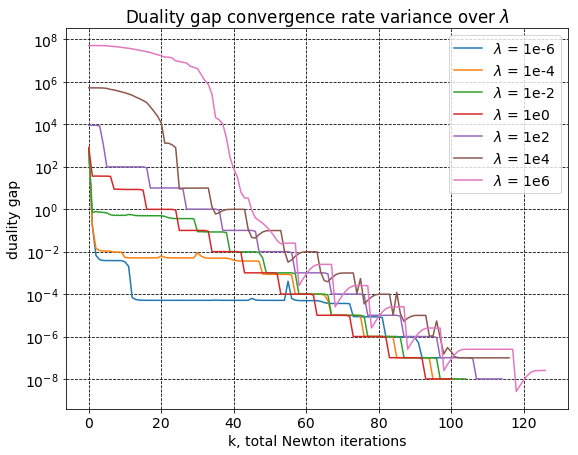

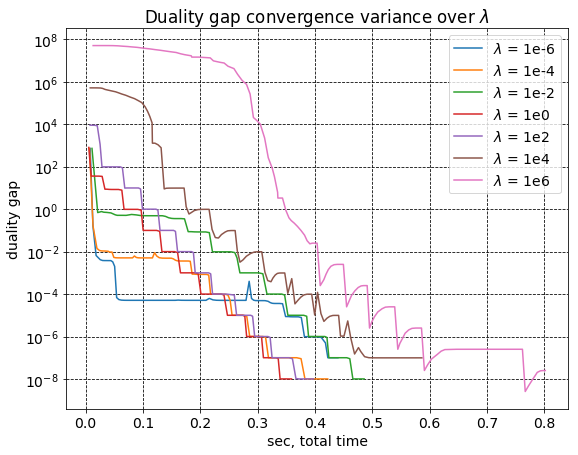

In [19]:
figure(figsize=(9, 7))
for e, hist in zip(grid, l_histories):
    semilogy(hist["duality_gap"], label=r"$\lambda$ = 1e%d"%e)
xlabel("k, total Newton iterations")
ylabel("duality gap")
title(r"Duality gap convergence rate variance over $\lambda$")
plt.grid(which='major', color='k', linestyle='--')
legend()
savefig('l_i.png', bbox_inches='tight')

figure(figsize=(9, 7))
for e, hist in zip(grid, l_histories):
    semilogy(hist["time"], hist["duality_gap"], label=r"$\lambda$ = 1e%d"%e)
xlabel("sec, total time")
ylabel("duality gap")
title(r"Duality gap convergence variance over $\lambda$")
plt.grid(which='major', color='k', linestyle='--')
legend()
savefig('l_t.png', bbox_inches='tight')